# Eigenfaces 

En este ejercicio vamos a ver como aplicar PCA al reconocimiento facial. Esta técnica originalmente desarrollada por Sirovich y Kirby se [publicó](http://www.face-rec.org/interesting-papers/General/ld.pdf) en 1987

Vamos a descargarnos un dataset público con miles de imágenes de más de 5000 personas. Cada imagen tiene tiene una resolución de 250x250px y han sido colocadas de tal forma que la cara siempre se encuentra en la misma posición.

Con esto vamos a hacer un algoritmo que nos diga si una foto pertenece a George W. Bush o no.

## 1. Descarga de datos

Primero creamos el directorio donde se descargarán las imágenes.

Después con la función `curl_download` descargamos la fotos comprimidas en formato tgz. Ocupa unos 233Mbytes.
La imágenes descomprimidas ocuparán unos 289Mbytes.

In [1]:
ext_dir<-'data/faces'
dir.create(ext_dir)

In [2]:
library(curl)
out_file<-'data/faces/faces.tgz'
curl_download('http://vis-www.cs.umass.edu/lfw/lfw-funneled.tgz',out_file,quiet=FALSE)

Using libcurl 7.85.0 with OpenSSL/3.0.5



In [3]:
untar(out_file,exdir=ext_dir)

In [4]:
list.files(ext_dir)

[1] "faces.tgz"    "lfw_funneled"

In [5]:
ext_dir<-'data/faces'
list.files(paste0(ext_dir,'/lfw_funneled'))

[1] "Aaron_Eckhart"                      
   [2] "Aaron_Guiel"                        
   [3] "Aaron_Patterson"                    
   [4] "Aaron_Peirsol"                      
   [5] "Aaron_Pena"                         
   [6] "Aaron_Sorkin"                       
   [7] "Aaron_Tippin"                       
   [8] "Abba_Eban"                          
   [9] "Abbas_Kiarostami"                   
  [10] "Abdel_Aziz_Al-Hakim"                
  [11] "Abdel_Madi_Shabneh"                 
  [12] "Abdel_Nasser_Assidi"                
  [13] "Abdoulaye_Wade"                     
  [14] "Abdul_Majeed_Shobokshi"             
  [15] "Abdul_Rahman"                       
  [16] "Abdulaziz_Kamilov"                  
  [17] "Abdullah"                           
  [18] "Abdullah_Ahmad_Badawi"              
  [19] "Abdullah_al-Attiyah"                
  [20] "Abdullah_Gul"                       
  [21] "Abdullah_Nasseef"                   
  [22] "Abdullatif_Sener"                   
  [23] "Abel_Aguilar"                       
  [24] "Abel_Pacheco"                       
  [25] "Abid_Hamid_Mahmud_Al-Tikriti"       
  [26] "Abner_Martinez"                     
  [27] "Abraham_Foxman"                     
  [28] "Aby_Har-Even"                       
  [29] "Adam_Ant"                           
  [30] "Adam_Freier"                        
  [31] "Adam_Herbert"                       
  [32] "Adam_Kennedy"                       
  [33] "Adam_Mair"                          
  [34] "Adam_Rich"                          
  [35] "Adam_Sandler"                       
  [36] "Adam_Scott"                         
  [37] "Adel_Al-Jubeir"                     
  [38] "Adelina_Avila"                      
  [39] "Adisai_Bodharamik"                  
  [40] "Adolfo_Aguilar_Zinser"              
  [41] "Adolfo_Rodriguez_Saa"               
  [42] "Adoor_Gopalakarishnan"              
  [43] "Adrian_Annus"                       
  [44] "Adrian_Fernandez"                   
  [45] "Adrian_McPherson"                   
  [46] "Adrian_Murrell"                     
  [47] "Adrian_Nastase"                     
  [48] "Adriana_Lima"                       
  [49] "Adriana_Perez_Navarro"              
  [50] "Adrianna_Zuzic"                     
  [51] "Adrien_Brody"                       
  [52] "Afton_Smith"                        
  [53] "Agbani_Darego"                      
  [54] "Agnelo_Queiroz"                     
  [55] "Agnes_Bruckner"                     
  [56] "Ahmad_Jbarah"                       
  [57] "Ahmad_Masood"                       
  [58] "Ahmed_Ahmed"                        
  [59] "Ahmed_Chalabi"                      
  [60] "Ahmed_Ghazi"                        
  [61] "Ahmed_Ibrahim_Bilal"                
  [62] "Ahmed_Lopez"                        
  [63] "Ahmed_Qureia"                       
  [64] "Ahmet_Demir"                        
  [65] "Ahmet_Necdet_Sezer"                 
  [66] "Ai_Sugiyama"                        
  [67] "Aicha_El_Ouafi"                     
  [68] "Aidan_Quinn"                        
  [69] "Aileen_Riggin_Soule"                
  [70] "Ain_Seppik"                         
  [71] "Ainsworth_Dyer"                     
  [72] "Aishwarya_Rai"                      
  [73] "Aitor_Gonzalez"                     
  [74] "Aiysha_Smith"                       
  [75] "AJ_Cook"                            
  [76] "AJ_Lamas"                           
  [77] "Ajit_Agarkar"                       
  [78] "Akbar_Al_Baker"                     
  [79] "Akbar_Hashemi_Rafsanjani"           
  [80] "Akhmed_Zakayev"                     
  [81] "Akiko_Morigami"                     
  [82] "Akmal_Taher"                        
  [83] "Al_Cardenas"                        
  [84] "Al_Davis"                           
  [85] "Al_Gore"                            
  [86] "Al_Leiter"                          
  [87] "Al_Pacino"                          
  [88] "Al_Sharpton"                        
  [89] "Alain_Cervantes"                   

In [9]:
name<-'Serena_Williams'
#name<-'David_Beckham'
name<-'Jacques_Chirac'

name<-'Colin_Powell'
name<-'Donald_Rumsfeld'
name<-'Gerhard_Schroeder'
name<-'Tony_Blair'
name<-'Jose_Maria_Aznar'
name<-'Juan_Carlos'
#name<-'Ariel_Sharon'
#name<-'Hugo_Chavez'
#name<-'George_W_Bush'
list.files(paste0(ext_dir,'/lfw_funneled/',name))

[1] "Juan_Carlos_0001.jpg"

### Ayuda:

Desde Jupyter también podemos abrir un Terminal y ejecutar los comandos directamente desde la consola.
Para ello hay que ir a: http://localhost:8888/tree y desde ahí: New -> Terminal

## 2. Carga de imágenes

Vamos a usar la librería `jgpeg` para cargar las imágenes.

Creamos una función que convierte las imágenes de color a blanco y negro.

In [10]:
library(jpeg)

In [11]:
get_pic<-function(name,id,root_path=ext_dir,bw=FALSE){    
    img <- tryCatch(
        readJPEG(paste0(root_path,'/lfw_funneled/',name,'/',name,'_',sprintf('%04d',id),'.jpg')),
        error=function(e) return(NULL))
    if (!is.null(img) && bw){
        img<-(img[,,1]+img[,,2]+img[,,3])/3
    }
    img
}

[1] "Dimesiones: 250x250"

[1] "Tipo: matrix" "Tipo: array"

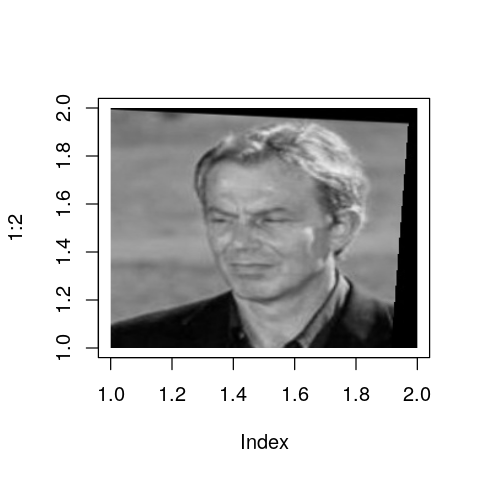

In [19]:
img <- get_pic('Tony_Blair',id=4,bw=TRUE,root_path=ext_dir)

paste("Dimesiones:",paste0(dim(img),collapse = 'x'))
paste("Tipo:",class(img))

options(repr.plot.height=4,repr.plot.width=4)
plot(1:2, type='n')
rasterImage(img, 1, 1, 2,2)

In [14]:
dim(img)<-c(1,250*250)
dim(img)

[1]     1 62500

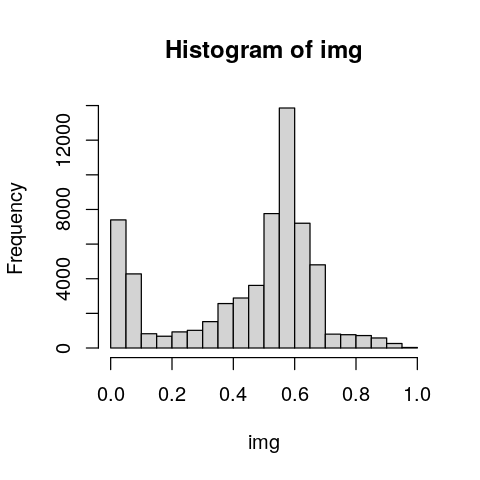

In [15]:
hist(img)

## 3. Transformación de imágenes

Convertimos la matriz de todas las imágenes de 250x250 en 1x62500

Cargamos todas las imágenes de George W. Bush y de otros personajes, y las guardamos en un array de $N\times62500$

A continuación dividimos esa matriz en dos, una para entrenamiento y otra para testing.

In [20]:
img<-rbind(img,img)
dim(img)

[1] 500 250

In [21]:
get_all_pics_for<-function(name){
    i<-0        
    list_imgs<-list()
    repeat{
        i<-i+1
        img <- get_pic(name,id=i,bw=TRUE)
        if(is.null(img)){
            break
        }
        dim(img)<-c(1,250*250)
        list_imgs[[i]]<-img
    }    
    do.call("rbind", list_imgs)
}

In [22]:
name<-'George_W_Bush'
pics_bush<-get_all_pics_for(name)
dim(pics_bush)

[1]   530 62500

In [23]:
pics_other<-get_all_pics_for('Ariel_Sharon')
for (name in c('Jose_Maria_Aznar','Hugo_Chavez','Tony_Blair','Colin_Powell',
               'Donald_Rumsfeld','Vladimir_Putin','Junichiro_Koizumi','Arnold_Schwarzenegger')){
    imgs<-get_all_pics_for(name)
    pics_other<-rbind(pics_other,imgs)
}
dim(pics_other)

[1]   823 62500

In [24]:
set.seed(1)
idx_bush<-sample(1:nrow(pics_bush),0.7*nrow(pics_bush),)
train_bush<-pics_bush[idx_bush,]
test_bush <-pics_bush[-idx_bush,]

idx_other<-sample(1:nrow(pics_other),0.7*nrow(pics_other),)
train_other<-pics_other[idx_other,]
test_other <-pics_other[-idx_other,]

In [25]:
train_matrix<-rbind(train_bush,train_other)
dim(train_matrix)

test_matrix <-rbind(test_bush,  test_other)
dim(test_matrix)


[1]   947 62500

[1]   406 62500

In [26]:
rownames(train_matrix)<-c(rep("bush",nrow(train_bush)),rep("other",nrow(train_other)))
rownames(test_matrix)<-c(rep("bush",nrow(test_bush)),rep("other",nrow(test_other)))

In [27]:
train_matrix[sample(1:nrow(train_matrix),10),1:10]

other,0.026143791,0.026143791,0.026143791,0.026143791,0.026143791,0.026143791,0.026143791,0.026143791,0.026143791,0.026143791
bush,0.000000000,0.000000000,0.001307190,0.001307190,0.000000000,0.001307190,0.002614379,0.002614379,0.003921569,0.003921569
other,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000
bush,0.002614379,0.002614379,0.003921569,0.000000000,0.001307190,0.967320261,0.960784314,0.956862745,0.952941176,0.952941176
bush,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.015686275
bush,0.001307190,0.001307190,0.002614379,0.003921569,0.003921569,0.003921569,0.001307190,0.001307190,0.000000000,0.005228758
other,0.070588235,0.066666667,0.062745098,0.062745098,0.062745098,0.062745098,0.065359477,0.065359477,0.065359477,0.065359477
bush,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000
bush,0.003921569,0.006535948,0.009150327,0.015686275,0.019607843,0.023529412,0.019607843,0.019607843,0.015686275,0.011764706
bush,0.005228758,0.005228758,0.010457516,0.002614379,0.015686275,0.000000000,0.003921569,0.000000000,0.006535948,0.006535948


![](img/Eigenfaces.png)

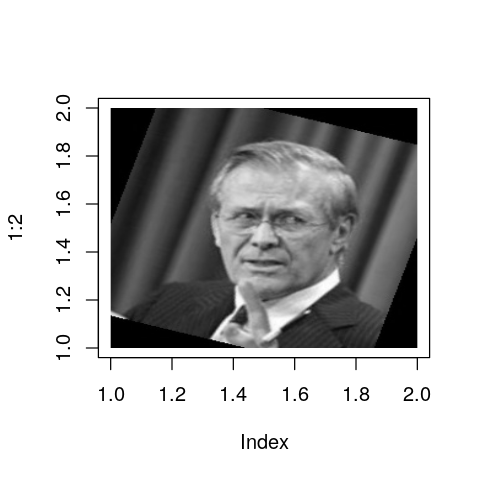

In [34]:
plot_row_image<-function(row){
    img<-matrix(row,ncol = sqrt(length(row)))
    plot(1:2, type='n')
    rasterImage(img, 1, 1, 2,2)
}
plot_row_image(train_matrix[740,])

## 4. Aplicamos PCA

Sobre la matriz de $train$ aplicamos PCA.

El resultado debería ser una matriz con 62500 autovectores de dimensión 62500. Pero dado que el número de fotos en training es de solo 947 (menor de 62500), los autovalores correspondientes a los autovectores desde 948 hasta 62500 son 0. Por ese motivo solo habra 947 autovectores de dimensión 62500.

#### Mejoras de R

Aquí estamos trabajando con matrices muy grandes y R por defecto es monohilo. Pero para acelerar operaciones de álgegra lineal se puede aprovechar de las librerías BLAS. Las teneis para
* windows: https://mran.microsoft.com/open
* Linux/Mac: https://github.com/xianyi/OpenBLAS
    * En sistemas tipo debian basta con instalar la libreria `libopenblas-dev`: apt-get install libopenblas-dev


In [35]:
pr_pics<-prcomp(train_matrix,center = TRUE, scale. = TRUE)

Partimos de la matriz original de training con 947 imágenes:
\\[
A=\begin{bmatrix}
0.1 & 0.6 & \cdots  & 0.1 \\ 
0 & 0.2 & \cdots & 0.5 \\ 
\vdots  &  & \ddots  & \vdots \\ 
0.3 & 0.7  & \cdots & 0.1
\end{bmatrix} \in \mathbb{R}^{947\times62500} \Rightarrow estandarizamos ~ \frac{x-\mu}{\sigma} \Rightarrow  covariaza \Rightarrow \begin{bmatrix}
0.05 & 0.06 & \cdots  & 0.03 \\ 
0.07 & 0.03 & \cdots & 0.01 \\ 
\vdots  &  & \ddots  & \vdots \\ 
0.02 & 0.08  & \cdots & 0.021
\end{bmatrix}_{62500\times62500} 
\\]

Calculamos los autovectores y autovalores de la matriz de covarianza.

Tendremos 62500 autovalores:
\\[
\lambda=\begin{bmatrix}
118 & 59.6 & 55.8 & \cdots & 1 & 0.9 & 1e-14 & 0 & \cdots & 0 
\end{bmatrix}_{1 \times 62500}
\\]
De los cuales solo los 947 primeros tendrán un valor superior a 0. Con lo cual podemos simplificar como:
\\[
\lambda=\begin{bmatrix}
118 & 59.6 & 55.8 & \cdots & 1 & 0.9 & 1e-14 
\end{bmatrix}_{1 \times 947}
\\]

Si tenemos 947 autovalores no nulos, solo necesitaremos los correspondientes 947 autovectores:

\\[
V=\begin{bmatrix}
0.002516356	& 0.0005953821& \cdots  & 0.0060715542 \\ 
0.002536501	& 0.0006830596 & \cdots  & 0.0495874353 \\
\vdots     &               & \ddots  & \vdots \\ 
0.001588527 &	-0.0003561657 & \cdots & -0.0005549179
\end{bmatrix}_{62500\times 947}
\\]

In [36]:
str(pr_pics)

List of 5
 $ sdev    : num [1:947] 118 59.6 55.8 54.9 49.7 ...
 $ rotation: num [1:62500, 1:947] 0.00252 0.00254 0.00251 0.00268 0.00272 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : NULL
  .. ..$ : chr [1:947] "PC1" "PC2" "PC3" "PC4" ...
 $ center  : num [1:62500] 0.0745 0.0805 0.0875 0.0936 0.0987 ...
 $ scale   : num [1:62500] 0.188 0.194 0.202 0.21 0.214 ...
 $ x       : num [1:947, 1:947] -132.9 -120.5 -83.9 125.5 12.4 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:947] "bush" "bush" "bush" "bush" ...
  .. ..$ : chr [1:947] "PC1" "PC2" "PC3" "PC4" ...
 - attr(*, "class")= chr "prcomp"


In [37]:
# Matriz de autovalores
pr_pics$sdev[1:10]

[1] 118.03100  59.63924  55.83644  54.87321  49.68690  49.41959  45.32600
 [8]  34.73524  33.36533  32.86763

In [38]:
# Matriz de autovectores
pr_pics$rotation[sample(1:nrow(pr_pics$rotation),5),1:10]

PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0.0062966263,0.0021960339,-0.001417279,-0.004760324,0.001205403,0.0035838114,-0.000574549,0.001253892,0.0007122516,-0.003844827
0.0063733642,-0.0002417793,-0.003073477,0.004679629,-0.001909871,-0.0017915933,0.002088636,0.002512903,0.0076521368,0.001524663
0.0000637951,-0.0098820175,0.002328691,-0.003919369,0.002209679,-0.0013318667,0.009247215,0.002268332,0.0026147128,0.004732313
0.0004082411,-0.0019271763,0.003342084,-0.001458232,0.002940858,-0.0009596421,0.002994889,-0.008670801,-0.0013711352,0.000857454
0.0057684865,-0.0001834390,-0.001362959,0.006454517,-0.001684511,0.0031799561,0.003953817,-0.003513339,-0.0014458605,0.003723400


### Transformando en el dominio PC

Podemos transformar una imagen en sus componentes principales multiplicándo por la matrix de autovectores el vector imagen estandarizado:

Dada una imagen convertida en un vector A_i:
\\[
A_i=\begin{bmatrix}
0.1 & 0.6 & & 0.5 \cdots  & 0.1 \\ 
\end{bmatrix}_{[1 \times 62500]}
\\]

Calculamos su valor estandarizado:
\\[
A_{ij}'=\frac{A_{ij}-\mu_{j}}{\sigma_j}
\\]
Donde:
\\[
\mu_j=\frac{\sum_i^n{A_{ij}}}{n}
\\]
\\[
\sigma^2_j=\frac{\sum_i^n ({A_{ij}-\mu_j})^2}{n}
\\]

Después calculamos la matrix de componentes principales multiplicando $A' \times V$:
\\[
A_{PC} = A'_{947\times62500} \times V_{62500\times947} \in \mathbb{R}^{947\times947}
\\]



In [39]:
#Matrix de componentes principales
dim(pr_pics$x)

[1] 947 947

In [40]:
#pr_pics$x[sample(1:nrow(pr_pics$x),5),1:10]
pr_pics$x[1,1:10]

PC1         PC2         PC3         PC4         PC5         PC6 
-132.943288  -31.829259    6.722381  -13.320298   24.853077   -6.171534 
        PC7         PC8         PC9        PC10 
  29.045648    4.679130  -25.696470   13.081500

In [41]:
pic_pca<-(matrix((train_matrix[1,]-pr_pics$center)/pr_pics$scale,nrow=1) %*% pr_pics$rotation)
pic_pca[1:10]
dim(pic_pca)

[1] -132.943288  -31.829259    6.722381  -13.320298   24.853077   -6.171534
 [7]   29.045648    4.679130  -25.696470   13.081500

[1]   1 947

In [42]:
predict(pr_pics, newdata = train_matrix[1:2,])[1:2,1:10]

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
bush,-132.9433,-31.82926,6.722381,-13.3203,24.85308,-6.171534,29.04565,4.67913,-25.696470,13.08150
bush,-120.4599,-35.03522,27.203425,-119.6665,49.86001,82.340689,43.51726,25.60983,1.917737,-12.19057


### Transformando de vuelta al dominio de las imágenes


Dada la matriz de componentes principales, podemos obtener la matriz original **sin nigún perdida de información** si multiplicamos por la inversa de la matriz de autovectores.

La matriz de autovectores es una matriz ortonormal. Eso significa que la transpuesta es su propia inversa ya que:
\\[
V \times V^T=I
\\]
Así pues:

\\[
A_{PC_{947\times947}} = A'_{947\times62500} \times V_{62500\times947} \\
A_{PC_{947\times947}} \times V^T_{947\times62500} = A'_{947\times62500} \times V_{62500\times947} \times V^T_{947\times62500} \\
A_{PC_{947\times947}} \times V^T_{947\times62500} = A'_{947\times62500} \times I_{62500\times62500}\\
A_{PC_{947\times947}} \times V^T_{947\times62500} = A'_{947\times62500}
\\]

Es decir, el vector que contiene la imagen original normalizada se puede obtener como:
\\[
A'=A_{PC} \times V^T
\\]

Después desnormalizamos $A'$ para volver al vector original de la imagen:
\\[
A_{ij}=(A'_{ij}+\mu_{j})·\sigma_j
\\]



In [43]:
recover_pic<-(pic_pca %*% t(pr_pics$rotation))*pr_pics$scale+pr_pics$center
summary(array(recover_pic))
#El valor de un pixel siempre está entre 0 y 1, errores en el redondeo hace que a veces esto no se cumpla. 
recover_pic[recover_pic<0]<-0
recover_pic[recover_pic>1]<-1
dim(recover_pic)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.1346  0.1712  0.2809  0.4105  1.0000 

[1]     1 62500

En este proceso se producen errores de rendodeo. Es por eso que deben ser ajustados y limitar el rango de la imagen a [0,1] La codificación de los números en binario se hace siguiendo el estandar [IEEE 754](https://en.wikipedia.org/wiki/IEEE_754)

![](https://upload.wikimedia.org/wikipedia/commons/thumb/d/d2/Float_example.svg/590px-Float_example.svg.png)

In [ ]:
bin2dec <- function(binaryvector) {
  sum(2^(which(rev(binaryvector))-1))
}
fracbin2dec <- function(frac) {
  sum(2^(-which(frac)))
}
xp<-c(F,T,T,T,T,T,F,F)
frac<-c(F,T,F,F,F,F,F,F,F,F,F,F,F,F,F,F,F,F,F,F,F,F,F)

2^(bin2dec(xp)-127)*(1+fracbin2dec(frac))

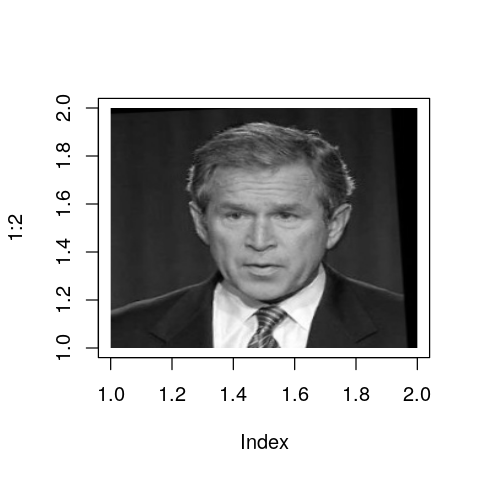

In [44]:
#Comprobamos que hemos podido recuperar la imagen original
plot_row_image(recover_pic)

### Importancia de los autovectores

Podemos pintar el valor de los autovectores. Recordemos los autovectores representan la desviación típica de la muestra de datos en la dirección marcada por su correspondiente autovector.

Si ordenamos los autovalores por su valor veremos como la mayor parte de la variación se encuentra en los primeros autovalores. El resto aportan cada vez menos información.

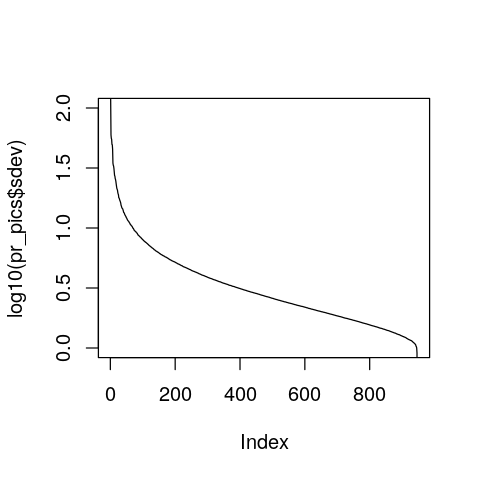

In [45]:
plot(log10(pr_pics$sdev),t='l',ylim = c(0,2))

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
-0.085426 -0.013901  0.002512  0.003188  0.019791  0.107906 

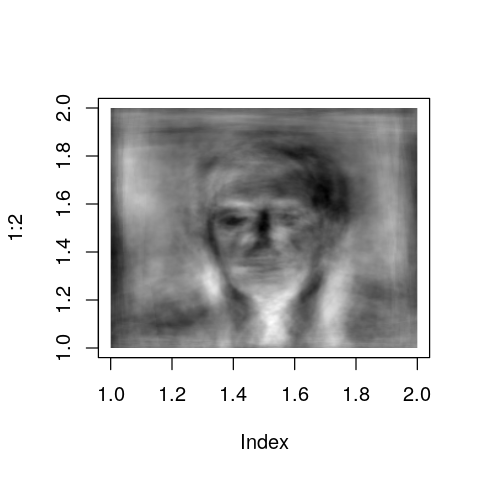

In [64]:
t_pic<-matrix(rep(0,ncol(pr_pics$rotation)),nrow=1)
#t_pic[1]<-1
#t_pic[1:50]<-1
#t_pic[100]<-1


pic_normalizada<-t_pic %*% t(pr_pics$rotation)
summary(array(pic_normalizada))
pic_normalizada<-(pic_normalizada-min(pic_normalizada))
pic_normalizada<-pic_normalizada/max(pic_normalizada)
plot_row_image(pic_normalizada)

Una vez que tenemos una imagen transformada con sus componentes principales podemos borrar los que corresponen a autovalores con menor peso.

De esta forma estaremos perdiendo información, pero la mínima posible, con lo cual la reconstrucción posterior de la imagen seguirá siendo posible, aunque con perdidas.

Se puede demostrar que para las imágenes del conjunto de train, si las pasamos al dominio de PCA, eliminamos los componentes menos importantes y las volvemos a transformar al dominio de las imágenes. Estas habrán sufrido una perdida de información mínima, es una compresión con perdidas muy eficiente.

Pero es más, si utilizamos una imagen de test y aplicamos el mismo proceso, aunque el resultado no será tan bueno, también veremos como es suficientemente bueno. Este método se puede utilizar para comprimir imágenes que comparten características comunes.

In [54]:
# Por motivos didácticos crearemos una función similar a predict:
transform_pca<-function(pca_result=pr_pics,row){
    v <-matrix(row,nrow=1)
    v_normalizada<- (v-pca_result$center)/pca_result$scale
    v_normalizada %*% pca_result$rotation    
}

# Y una función que haga su inversa:
inv_transform_pca<-function(pca_result=pr_pics,row){
    v <-matrix(row,nrow=1)    
    pic_normalizada<-v %*% t(pca_result$rotation)
    pic<-pic_normalizada*pca_result$scale+pca_result$center
    pic[pic<0]<-0
    pic[pic>1]<-1
    pic
}

[1]   1 947

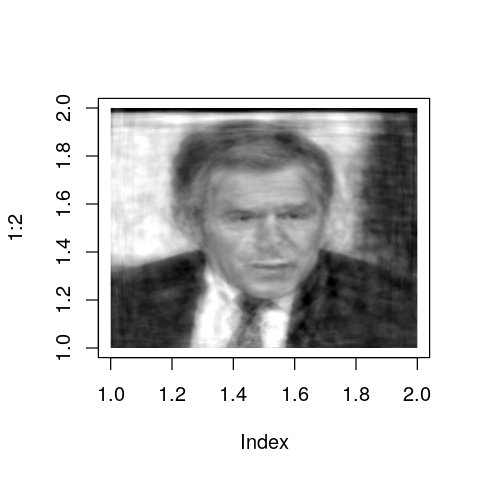

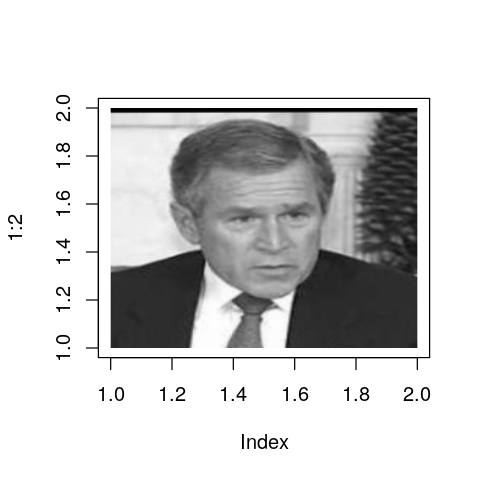

In [66]:
orig_pic<-train_matrix[100,]
#orig_pic<-test_matrix[300,]

number_of_pca_components<-200
t_pic<-transform_pca(row=orig_pic)
t_pic[number_of_pca_components:length(t_pic)]<-0
dim(t_pic)

pic<-inv_transform_pca(row=t_pic)
plot_row_image(pic)
plot_row_image(orig_pic)

Recordemos que el PCA trabaja con valores centrados en 0 y desviación típica 1. Por eso hemos normalizado.

Los coeficientes del PCA simplemente dicen cuanto se desplaza el valore real respecto a la media en las direcciones de máxima dispersión. Es así como se consigue la compresión.

Si nos fijamos en la media de todas las caras, vemos que parece una cara, lo que guardaríamos en el PCA es la diferencia de una cara respecto a otra.

In [ ]:
plot_row_image(pr_pics$center)

In [ ]:
mean_face<-colSums(train_matrix)/nrow(train_matrix)
plot_row_image(mean_face)

## 5. Clasificación usando PCA

Ya tenemos todos componentes principales de las imágenes. Estos componentes principales están alineados con la dirección de máxima varianza.

Así pues podemos construir un clasificador fijándonos únicamente en los primeros componentes principales. La imagen que más se acerque tendrá más posibilidades de ser de la misma persona.

In [ ]:
number_of_pca_components<-200

id_test_pic<-300
#id_test_pic<-200
id_test_pic<-30

orig_pic<-test_matrix[id_test_pic,]

t_pic<-transform_pca(row=orig_pic)
t_pic<-matrix(t_pic[1:number_of_pca_components],nrow=1)

In [ ]:
Apc<-pr_pics$x[,1:number_of_pca_components]
dist<-rep(NA,nrow(Apc))
for (i in 1:nrow(Apc)){
    dist[i]<-sum((t_pic-Apc[i,])^2)
}
# Equivalente a:
#dist<-rowSums((t_pic[rep(1, times = nrow(pr_pics$x)), ]-pr_pics$x)^2)

In [ ]:
#El clasificador dice que la foto más parecida es esta:
which.min(dist)

In [ ]:
plot_row_image(train_matrix[which.min(dist),])
plot_row_image(orig_pic)

In [ ]:
paste("La imagen es de:",
rownames(test_matrix)[id_test_pic],
      "el clasificador dice que es de:",
      rownames(train_matrix)[which.min(dist)])
      

## K-nearest neighbor

Esto es equivalente a un KNN con N=1
![](https://upload.wikimedia.org/wikipedia/commons/thumb/e/e7/KnnClassification.svg/220px-KnnClassification.svg.png)


Calculemos la matriz de confianza.

In [ ]:
number_of_pca_components<-200

result<-data.frame(real=rownames(test_matrix),pred=NA, stringsAsFactors = T)
Apc<-pr_pics$x[,1:number_of_pca_components]

for (id_test_pic in 1:nrow(test_matrix)){

    orig_pic<-test_matrix[id_test_pic,]

    t_pic<-transform_pca(row=orig_pic)[,1:number_of_pca_components]
    t_pic<-matrix(t_pic,nrow=1)
        
    dist<-rowSums((t_pic[rep(1, times = nrow(Apc)), ]-Apc)^2)    
    
    result$pred[id_test_pic]<-rownames(train_matrix)[which.min(dist)]
}

In [ ]:
result$pred=as.factor(result$pred)
str(result)

In [ ]:
library(caret)

In [ ]:
confusionMatrix(data = result$pred, reference= result$real)

In [ ]:
sum(result$real=="bush")

In [ ]:
sum(result$pred=="bush")

In [ ]:
# Más información de como obtener esas figuras:
# https://www.rdocumentation.org/packages/caret/versions/6.0-85/topics/confusionMatrix
Pra<-sum(result$real==result$pred)/nrow(result)

paste("Accuracy:",sum(result$real==result$pred)/nrow(result))
Pr_bush<-sum(result$real=="bush")/nrow(result)
Pr_other<-sum(result$real=="other")/nrow(result)
Pd_bush<-sum(result$pred=="bush")/nrow(result)
Pd_other<-sum(result$pred=="other")/nrow(result)

Pre<-Pr_bush*Pd_bush+Pr_other*Pd_other
paste("Kappa:",(Pra-Pre)/(1-Pre))

paste("Sensibilidad:",sum(result$pred=="bush" & result$real=="bush")/sum(result$real=="bush"))
paste("Especifidad:",sum(result$pred=="other" & result$real=="other")/sum(result$real=="other"))
paste("Pr pred:",sum(result$pred=="bush" & result$real=="bush")/sum(result$pred=="bush"))

In [ ]:
number_of_pca_components<-100
knn<-6

result<-data.frame(real=rownames(test_matrix),pred=NA)
Apc<-pr_pics$x[,1:number_of_pca_components]

for (id_test_pic in 1:nrow(test_matrix)){

    orig_pic<-test_matrix[id_test_pic,]

    t_pic<-transform_pca(row=orig_pic)[,1:number_of_pca_components]
    t_pic<-matrix(t_pic,nrow=1)
        
    dist<-rowSums((t_pic[rep(1, times = nrow(Apc)), ]-Apc)^2)    
    
    knn_tags<-rownames(train_matrix)[order(dist,decreasing = F) %in% c(1:knn)]
    
    #most_common_name<-names(sort(table(knn_tags),decreasing = T))[1]
    most_common_name<-names(which.max(table(knn_tags)))
    
    result$pred[id_test_pic]<-most_common_name
}

In [ ]:
most_common_name

In [ ]:
result$pred=as.factor(result$pred)
confusionMatrix(table(result$pred,result$real))

In [ ]:
result$pred=as.factor(result$pred)
confusionMatrix(table(result$pred,result$real))

## Cluster

In [ ]:
A<-pr_pics$x[,1:200]

d <- dist(A,method = "euclidean")
hc <- hclust(d,method="average")
hcd <- as.dendrogram(hc)
plot(hcd)
table(rownames(A),cutree(hc,h=350))

In [ ]:
library(dbscan)
cl <- hdbscan(pr_pics$x[,1:3], minPts = 10,gen_hdbscan_tree=TRUE)
cl

In [ ]:
plot(cl)

In [ ]:
table(cl$cluster,rownames(pr_pics$x))

In [ ]:
which(cl$cluster==3)

In [ ]:
plot_row_image(train_matrix[405,])

### Regresión logistica

Podemos mejorar el algoritmo, en lugar de usar un KNN podemos usar una regresión logistica sobre los componenetes principales más importantes.

In [ ]:
number_of_pca_components<-150
df_train<-data.frame(pr_pics$x[,1:number_of_pca_components])
df_train$name<-as.factor(rownames(pr_pics$x))
head(df_train)

In [ ]:
model<-glm(df_train,formula="name~.",family=binomial)
summary(model)

In [ ]:
summary(model$fitted.values)

In [ ]:
confusionMatrix(data=as.factor(ifelse(model$fitted.values<00.5,'bush','other')),                
                reference=df_train$name)

In [ ]:
test_pics_pca<-predict(pr_pics,test_matrix)
df_test<-data.frame(test_pics_pca[,1:number_of_pca_components])
df_test$name<-as.factor(rownames(test_pics_pca))
head(df_test)

In [ ]:
pred_test_glm <- predict(model,df_test)
head(pred_test_glm)

In [ ]:
df_result<-data.frame(real=df_test$name,
                      pred=pred_test_glm,row.names = NULL)

In [ ]:
summary(df_result)

In [ ]:
df_result$pred_name<-as.factor(ifelse(df_result$pred<0,'bush','other'))
confusionMatrix(data=df_result$pred_name,reference=df_result$real)

In [ ]:
library(ROCR)

#Con type="response" utilizamos la salida de la link function, 
# pasa por la función sigmoidal (inversa de logit) y devuelve un valor en el rango [0,1] 
df_result$p<-predict(model,df_test,type="response")

pr <- prediction(df_result$p, df_test$name)
prf <- performance(pr, measure = "tpr", x.measure = "fpr")
plot(prf)

In [ ]:
prf <- performance(pr, measure = "prec", x.measure = "rec")
plot(prf)

In [ ]:
performance(pr, measure = "auc")@y.values

![](img/Eigenfaces_flujo_modelos.png)

#### Ejemplo con regularización

In [ ]:
number_of_pca_components<-150
df_train<-data.frame(pr_pics$x[,1:number_of_pca_components])
df_train$name<-as.factor(rownames(pr_pics$x))
head(df_train)

In [ ]:
#model<-glm(df_train,formula="name~.",family=binomial)

cvfit<-glmnetUtils::cv.glmnet(name~.,
                              family = "binomial",
                              data=df_train,nfolds=10,alpha=1)
plot(cvfit)

In [ ]:
test_pics_pca<-predict(pr_pics,test_matrix)
df_test<-data.frame(test_pics_pca[,1:number_of_pca_components])
df_test$name<-as.factor(rownames(test_pics_pca))

In [ ]:
p<-predict(cvfit,newdata=df_test,s=cvfit$lambda.min)

pr <- prediction(p, df_test$name)
prf_auc=performance(pr, measure = "auc")
paste("The AUC is",prf_auc@y.values[[1]])

In [ ]:
df_result$pred_name<-as.factor(ifelse(p<0,'bush','other'))
confusionMatrix(table(df_result$pred_name,df_result$real))

In [ ]:
coef(cvfit,s=cvfit$lambda.min)